In [1]:
import pandas as pd
import numpy as np
from utilsPtBr import Utils

dataPath = 'data/shortCorpus.csv'
df_uf = pd.read_csv(dataPath, sep=';')
util = Utils()

In [2]:
dictDataframeTreino = {
    "tag": [],
    "text": [],
}

dictDataframeTeste = {
    "tag": [],
    "text": [], 
}

dictDataframeWithoutAnothersTreino = {
    "tag": [],
    "text": [],
}

dictDataframeWithoutAnothersTeste = {
    "tag": [],
    "text": [], 
}


formatTag = {
    "Publicação - Despacho / Decisão": 1,
    "Publicação - Sentença": 2,
    "Publicação - Audiência": 3,
}


In [3]:
from random import randint
def calcTestLineAleatory():
    numberAleatory = randint(0,99);
    if numberAleatory % 9 == 1: 
        return True;W

In [4]:
# pre formatando texto e separando treino e teste
vocabulary = {
    'UNKNOWN': 'UNKNOWN'
}

for i in range (len(df_uf.index)):
    tag = df_uf.loc[i].iloc[1]
    tag = formatTag.get(tag, 0)
  
    text = df_uf.loc[i].iloc[2]
    tokens = util.tokenize(text)
    for tok in set(tokens):
        if any(char.isdigit() for char in tok):
            vocabulary['NUMBER'] = tok
        else:  
            vocabulary[tok] = tok
    #freq = util.getPropoFreq(tokens)
  
    if calcTestLineAleatory():
        dictDataframeTeste['tag'].append(tag)
        dictDataframeTeste['text'].append(tokens)
    else:
        dictDataframeTreino['tag'].append(tag)
        dictDataframeTreino['text'].append(tokens)
    if tag != 0:
        if calcTestLineAleatory():
            dictDataframeWithoutAnothersTeste['tag'].append(tag)
            dictDataframeWithoutAnothersTeste['text'].append(tokens)
        else:
            dictDataframeWithoutAnothersTreino['tag'].append(tag)
            dictDataframeWithoutAnothersTreino['text'].append(tokens)     



In [5]:
vocabulary["UNKNOWN"] = "UNKNOWN"
sizeVocabulary = len(vocabulary.keys())
print('size of vocanulary is ' + str(len(vocabulary.keys())) + ' words!')

word2index = {}
def get_word_2_index(vocab):
    isWord2index = {}
    for i,word in enumerate(vocab):
        if any(char.isdigit() for char in tok):
            isWord2index['NUMBER'] = i 
        else: 
            isWord2index[word] = i
    return isWord2index

word2index = get_word_2_index(vocabulary.keys())

print(word2index["UNKNOWN"])
def text_to_vector(tokens):
    totalUnknow = 0;
    layer = np.zeros(len(vocabulary.keys()),dtype=float)
    for word in tokens:
        index = word2index.get(word, word2index["UNKNOWN"])
        
        if any(char.isdigit() for char in word):
            index = word2index["NUMBER"]

        layer[index] += 1
        if index ==  word2index["UNKNOWN"]:
            totalUnknow += 1
#    if(totalUnknow> 0):        
#        print('total de palavras desconhecidas no vocabulario: ' + str(totalUnknow))

    return np.asarray(layer, dtype=np.int_)

size of vocanulary is 21216 words!
0


In [6]:
textsTreino = []
tagsTreino = []
textsTest = []
tagsTest = []
textsWOTreino = []
tagsWOTreino = []
textsWOTest = []
tagsWOTest = []

for i in range (len(dictDataframeTreino['text'])):
    textsTreino.append(text_to_vector(dictDataframeTreino['text'][i]))
    tagsTreino.append(dictDataframeTreino['tag'][i])

for i in range (len(dictDataframeTeste['text'])):
    textsTest.append(text_to_vector(dictDataframeTeste['text'][i]))
    tagsTest.append(dictDataframeTeste['tag'][i])

for i in range (len(dictDataframeWithoutAnothersTreino['text'])):
    textsWOTreino.append(text_to_vector(dictDataframeWithoutAnothersTreino['text'][i]))
    tagsWOTreino.append(dictDataframeWithoutAnothersTreino['tag'][i])

for i in range (len(dictDataframeWithoutAnothersTeste['text'])):
    textsWOTest.append(text_to_vector(dictDataframeWithoutAnothersTeste['text'][i]))
    tagsWOTest.append(dictDataframeWithoutAnothersTeste['tag'][i])


textsTreino = np.asarray(textsTreino, dtype=np.intc)
tagsTreino = np.asarray(tagsTreino, dtype=np.intc)
textsTest = np.asarray(textsTest, dtype=np.intc)
tagsTest = np.asarray(tagsTest, dtype=np.intc)
textsWOTreino = np.asarray(textsWOTreino, dtype=np.intc)
tagsWOTreino = np.asarray(tagsWOTreino, dtype=np.intc)
textsWOTest = np.asarray(textsWOTest, dtype=np.intc)
tagsWOTest = np.asarray(tagsWOTest, dtype=np.intc)

In [7]:
print('Total de amostras')
print('treino ' + str(len(tagsTreino)))
print('teste ' + str(len(tagsTest)))
print('treino sem outros ' + str(len(tagsWOTreino)))
print('teste sem outros ' + str(len(tagsWOTest)))


Total de amostras
treino 4668
teste 628
treino sem outros 3566
teste sem outros 407


In [8]:

from sklearnClass import SKLRandomForestClassifier, SKLLogisticRegression, SKLExtraTreesClassifier, SKLDecisionTreeClassifier, SKLKNeighborsClassifier

RandomForestClassifier = SKLRandomForestClassifier()
LogisticRegression = SKLLogisticRegression()
ExtraTreesClassifier = SKLExtraTreesClassifier()
DecisionTreeClassifier = SKLDecisionTreeClassifier()
KNeighborsClassifier = SKLKNeighborsClassifier()

Vamos testar diferentes metodos de aprendizado supervisionado da biblioteca sklean e ver como eles se comportam com nossos dados. 

In [9]:
LogisticRegression.fit(textsTreino, tagsTreino)
LogisticRegression.test(textsTest, tagsTest)

score:      77.229%
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       146
           1       0.76      0.76      0.76       189
           2       0.82      0.77      0.79       137
           3       0.92      0.95      0.93       156

    accuracy                           0.77       628
   macro avg       0.77      0.77      0.77       628
weighted avg       0.77      0.77      0.77       628



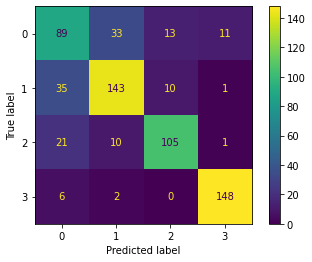

In [10]:
LogisticRegression.getConfusionMatrix(textsTest, tagsTest)

In [11]:
LogisticRegression.fit(textsWOTreino, tagsWOTreino)
LogisticRegression.test(textsWOTest, tagsWOTest)

score:      93.612%
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       163
           2       0.89      0.90      0.89       117
           3       1.00      0.99      1.00       127

    accuracy                           0.94       407
   macro avg       0.94      0.94      0.94       407
weighted avg       0.94      0.94      0.94       407



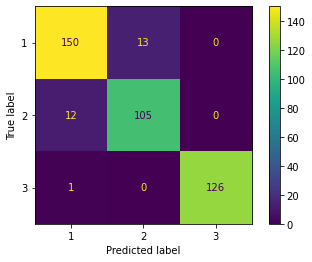

In [12]:
LogisticRegression.getConfusionMatrix(textsWOTest, tagsWOTest)

In [13]:
RandomForestClassifier.fit(textsTreino, tagsTreino)
RandomForestClassifier.test(textsTest, tagsTest)

score:      78.981%
              precision    recall  f1-score   support

           0       0.68      0.49      0.57       146
           1       0.77      0.77      0.77       189
           2       0.77      0.91      0.83       137
           3       0.90      0.99      0.94       156

    accuracy                           0.79       628
   macro avg       0.78      0.79      0.78       628
weighted avg       0.78      0.79      0.78       628



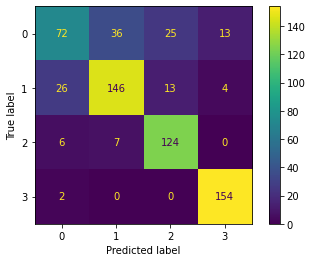

In [14]:
RandomForestClassifier.getConfusionMatrix(textsTest, tagsTest)

In [15]:
RandomForestClassifier.fit(textsWOTreino, tagsWOTreino)
RandomForestClassifier.test(textsWOTest, tagsWOTest)

score:      94.595%
              precision    recall  f1-score   support

           1       0.97      0.90      0.93       163
           2       0.88      0.96      0.92       117
           3       0.98      1.00      0.99       127

    accuracy                           0.95       407
   macro avg       0.94      0.95      0.95       407
weighted avg       0.95      0.95      0.95       407



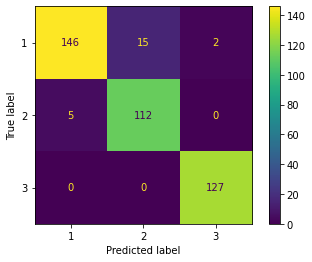

In [16]:
RandomForestClassifier.getConfusionMatrix(textsWOTest, tagsWOTest)

In [17]:
ExtraTreesClassifier.fit(textsTreino, tagsTreino)
ExtraTreesClassifier.test(textsTest, tagsTest)

score:      79.936%
              precision    recall  f1-score   support

           0       0.70      0.53      0.60       146
           1       0.79      0.78      0.79       189
           2       0.76      0.90      0.83       137
           3       0.91      0.99      0.94       156

    accuracy                           0.80       628
   macro avg       0.79      0.80      0.79       628
weighted avg       0.79      0.80      0.79       628



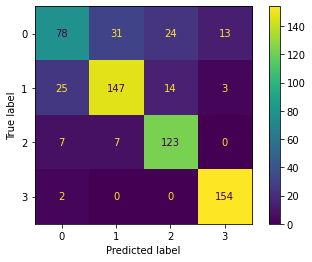

In [18]:
ExtraTreesClassifier.getConfusionMatrix(textsTest, tagsTest)

In [19]:
ExtraTreesClassifier.fit(textsWOTreino, tagsWOTreino)
ExtraTreesClassifier.test(textsWOTest, tagsWOTest)

score:      93.612%
              precision    recall  f1-score   support

           1       0.94      0.90      0.92       163
           2       0.87      0.92      0.90       117
           3       0.99      1.00      1.00       127

    accuracy                           0.94       407
   macro avg       0.94      0.94      0.94       407
weighted avg       0.94      0.94      0.94       407



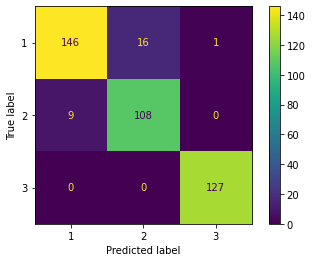

In [20]:
ExtraTreesClassifier.getConfusionMatrix(textsWOTest, tagsWOTest)


In [21]:
DecisionTreeClassifier.fit(textsTreino, tagsTreino)
DecisionTreeClassifier.test(textsTest, tagsTest)

score:      71.497%
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       146
           1       0.70      0.62      0.66       189
           2       0.69      0.75      0.72       137
           3       0.90      0.95      0.92       156

    accuracy                           0.71       628
   macro avg       0.71      0.72      0.71       628
weighted avg       0.71      0.71      0.71       628



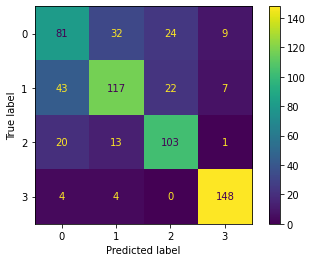

In [22]:
DecisionTreeClassifier.getConfusionMatrix(textsTest, tagsTest)

In [23]:
DecisionTreeClassifier.fit(textsWOTreino, tagsWOTreino)
DecisionTreeClassifier.test(textsWOTest, tagsWOTest)

score:      90.663%
              precision    recall  f1-score   support

           1       0.93      0.86      0.89       163
           2       0.82      0.91      0.86       117
           3       0.97      0.96      0.96       127

    accuracy                           0.91       407
   macro avg       0.91      0.91      0.91       407
weighted avg       0.91      0.91      0.91       407



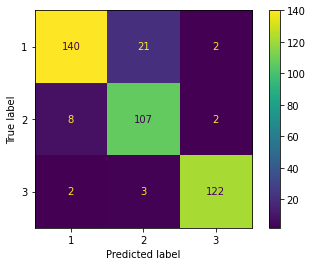

In [24]:
DecisionTreeClassifier.getConfusionMatrix(textsWOTest, tagsWOTest)

In [25]:
KNeighborsClassifier.fit(textsTreino, tagsTreino)
KNeighborsClassifier.test(textsTest, tagsTest)

score:      61.306%
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       146
           1       0.61      0.53      0.57       189
           2       0.71      0.50      0.58       137
           3       0.64      0.93      0.76       156

    accuracy                           0.61       628
   macro avg       0.62      0.61      0.60       628
weighted avg       0.62      0.61      0.60       628



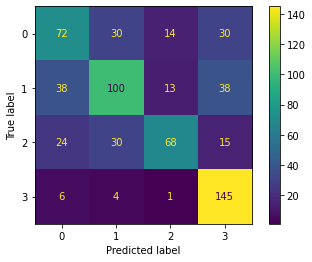

In [26]:
KNeighborsClassifier.getConfusionMatrix(textsTest, tagsTest)

In [27]:
KNeighborsClassifier.fit(textsWOTreino, tagsWOTreino)
KNeighborsClassifier.test(textsWOTest, tagsWOTest)

score:      70.270%
              precision    recall  f1-score   support

           1       0.71      0.62      0.66       163
           2       0.81      0.54      0.65       117
           3       0.65      0.96      0.78       127

    accuracy                           0.70       407
   macro avg       0.72      0.71      0.70       407
weighted avg       0.72      0.70      0.69       407



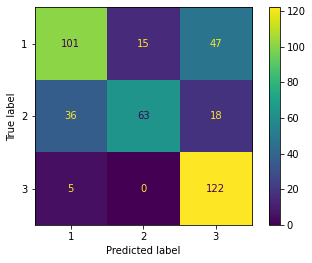

In [28]:
KNeighborsClassifier.getConfusionMatrix(textsWOTest, tagsWOTest)